# 1. Exercises 4.1, 4.2, 4.3 

4.1 Let's denote the sentence "I always like foreign films." as a sequence of words: 
W1 = "I", 
W2 = "always", 
W3 = "like", 
W4 = "foreign", 
W5 = "films".
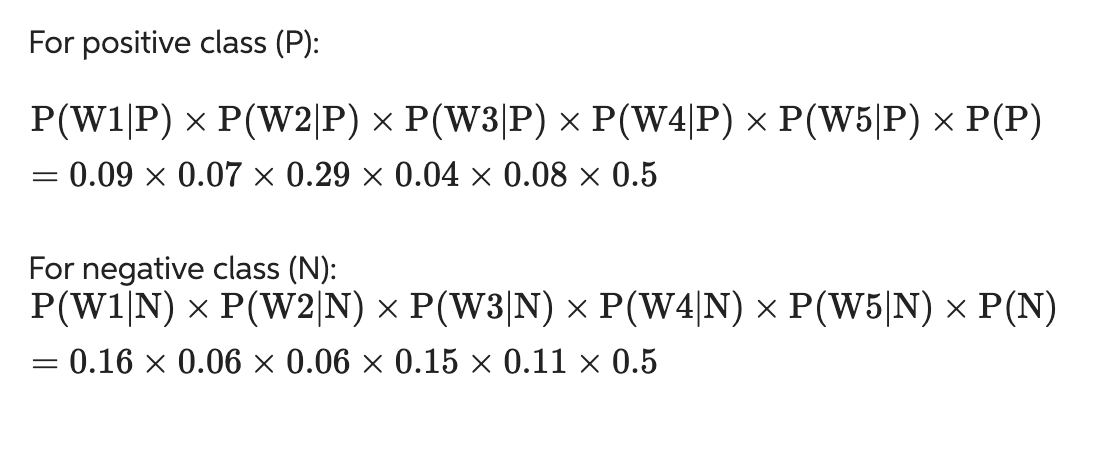


We can show that the likelihoods for the statement "I always like foreign films." are higher for the positive class than the negative class by comparing the conditional probabilities for the positive and negative classes. 

Naive Bayes would likely assign the positive class to the sentence "I always like foreign films.".

4.2 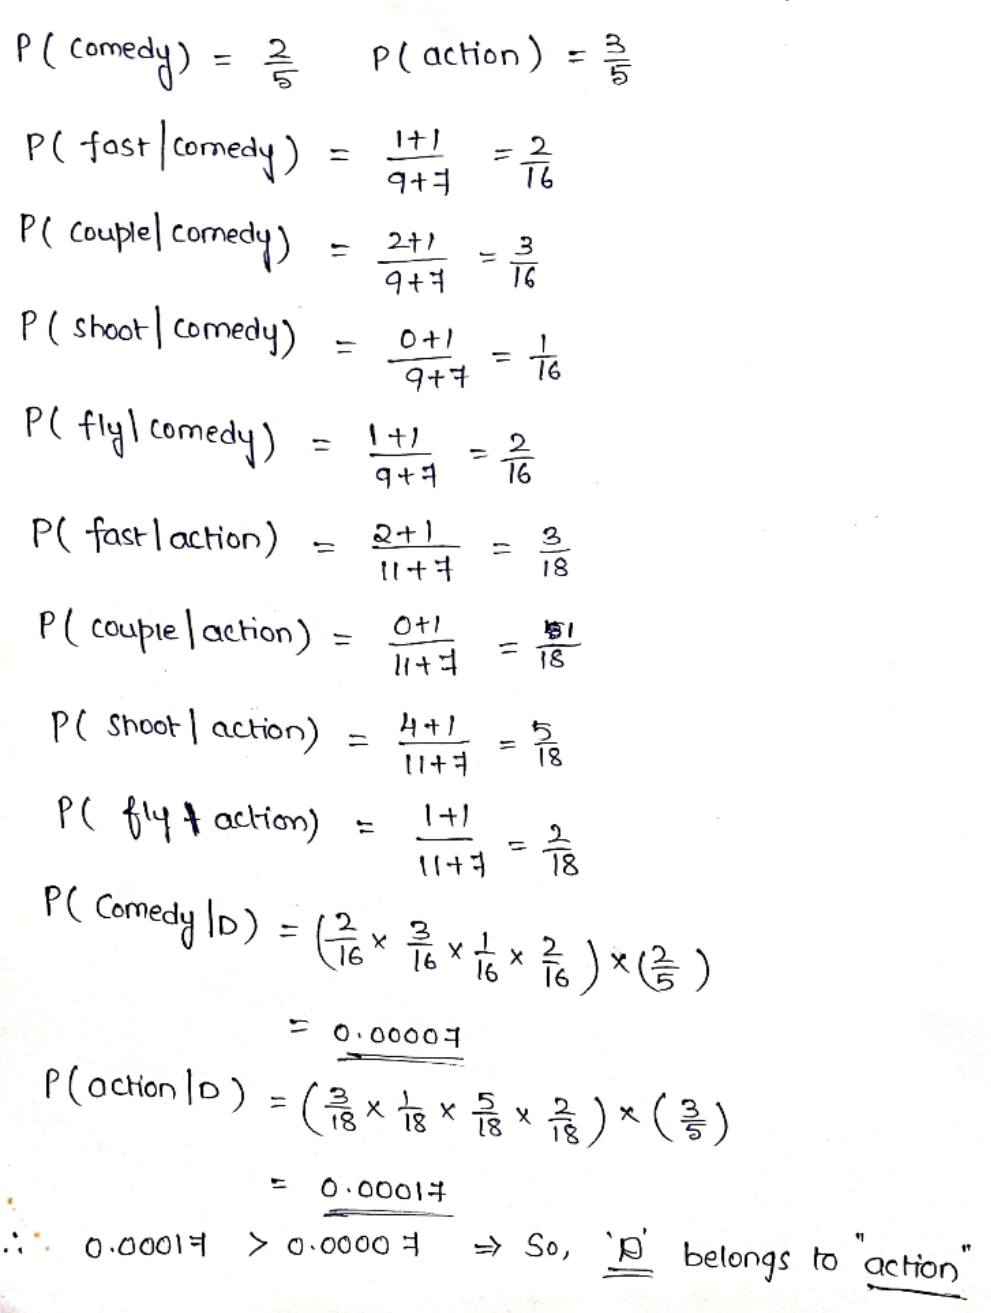

4.3 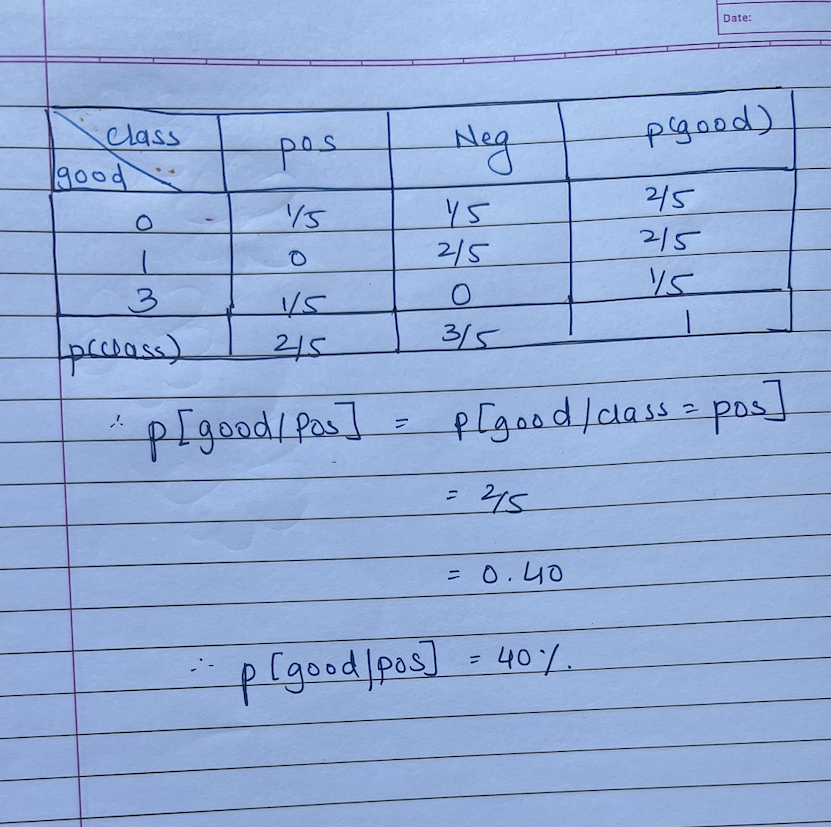

# 2. What’s odds rule in binary classification, and how can you use it?

It is used in binary classification to quantify the relationship between the probabilities of two outcomes. It is commonly employed in logistic regression and other statistical models. The odds ratio represents the odds of one outcome occurring relative to the odds of the other outcome.

In binary classification, suppose we have two classes: positive (1) and negative (0). The odds of the positive outcome can be defined as the ratio of the probability of the positive outcome to the probability of the negative outcome. Mathematically, the odds ratio can be expressed as:

Odds Ratio = P(positive) / P(negative)

The odds ratio can be greater than 1, indicating that the positive outcome is more likely, or less than 1, indicating that the negative outcome is more likely. A value of 1 implies equal odds for both outcomes.

The odds rule can be used in various ways in binary classification:

Interpreting the model coefficients: In logistic regression, the coefficients associated with the predictor variables represent the change in the log-odds of the positive outcome for a one-unit change in the predictor. By exponentiating the coefficient, you can obtain the odds ratio, which provides insight into the impact of a predictor on the outcome.

Comparing the odds between groups: The odds ratio can be used to compare the odds of the positive outcome between different groups or levels of a categorical variable. This comparison helps determine the relative likelihood of the positive outcome across groups.

Assessing the strength of association: The odds ratio measures the strength of association between a predictor and the outcome. A higher odds ratio indicates a stronger relationship, while an odds ratio close to 1 suggests a weak or no relationship.

Making predictions: The odds ratio can be used to make predictions for new data points. By calculating the odds ratio for a given set of predictor values, you can estimate the likelihood of the positive outcome relative to the negative outcome.



# 3.	Using the dataset from  https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/, you will create a Naïve Bayes classifier with binary bag of words to classify the movies.

- Compute the probability on the test set, using a 5-fold cross validation. What’s the accuracy obtained?
- Use the technique learned in class to add NOT_ to all words in the sentence following the word “not”, and a 5-fold cross validation, what’s the accuracy obtained?
- For both methods, compute the precision and recall

# 4.	Using the dataset from https://keras.io/api/datasets/reuters/, use Naïve Bayes to perform multiclass classification.

- What’s the macroaveraging of the accuracy?

# **Naïve Bayes classifier with binary bag of words to classify the movies.**

In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold

In [27]:
df = pd.read_csv('/content/drive/MyDrive/ELEN523/Lab4/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [28]:
def train_naive_bayes(X_train, y_train):
    vectorizer = CountVectorizer(binary=True)
    X_train_vec = vectorizer.fit_transform(X_train)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    return vectorizer, clf

In [29]:
def evaluate_model(X, y, vectorizer, clf):
    X_vec = vectorizer.transform(X)
    y_pred = clf.predict(X_vec)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    return accuracy, precision, recall

In [30]:
def cross_validation(X, y, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        vectorizer, clf = train_naive_bayes(X_train, y_train)
        accuracy, precision, recall = evaluate_model(X_test, y_test, vectorizer, clf)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    return accuracies, precisions, recalls

In [31]:
X = df['review'].values
y = df['sentiment'].values

In [32]:
accuracies1, precisions1, recalls1 = cross_validation(X, y, n_folds=5)

In [33]:
X_not = df['review'].apply(lambda x: x.replace('not ', 'not NOT_')).values
accuracies2, precisions2, recalls2 = cross_validation(X_not, y, n_folds=5)

In [34]:
accuracy1_mean = np.mean(accuracies1)
precision1_mean = np.mean(precisions1)
recall1_mean = np.mean(recalls1)

In [35]:
accuracy2_mean = np.mean(accuracies2)
precision2_mean = np.mean(precisions2)
recall2_mean = np.mean(recalls2)

In [37]:
print("Method 1: Binary bag of words")
print("Accuracy: {:.4f}".format(accuracy1_mean))
print("Precision: {:.4f}".format(precision1_mean))
print("Recall: {:.4f}".format(recall1_mean))

Method 1: Binary bag of words
Accuracy: 0.8552
Precision: 0.8762
Recall: 0.8273


In [38]:
print("\nMethod 2: Adding NOT_ to words after 'not'")
print("Accuracy: {:.4f}".format(accuracy2_mean))
print("Precision: {:.4f}".format(precision2_mean))
print("Recall: {:.4f}".format(recall2_mean))


Method 2: Adding NOT_ to words after 'not'
Accuracy: 0.8575
Precision: 0.8780
Recall: 0.8305


In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ELEN523/Lab4/IMDB Dataset.csv')

# Convert sentiment labels to binary values
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into features and labels
reviews = data['review'].values
sentiments = data['sentiment'].values

# Create binary bag of words representation
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(reviews)

# Create Naïve Bayes classifier and perform cross-validation
classifier = MultinomialNB()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, sentiments, cv=kfold)

# Calculate accuracy
accuracy = np.mean(scores)

# Print the accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.85558


In [41]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ELEN523/Lab4/IMDB Dataset.csv')

# Convert sentiment labels to binary values
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into features and labels
reviews = data['review'].values
sentiments = data['sentiment'].values

# Modify the reviews by adding "NOT_" to words following "not"
stop_words = set(stopwords.words('english'))

modified_reviews = []
for review in reviews:
    tokens = word_tokenize(review)
    modified_tokens = []
    negate = False
    for token in tokens:
        if token.lower() == 'not':
            negate = True
        elif negate and token.lower() not in stop_words:
            modified_tokens.append("NOT_" + token)
            negate = False
        else:
            modified_tokens.append(token)
    modified_reviews.append(' '.join(modified_tokens))

# Create binary bag of words representation
vectorizer = CountVectorizer(binary=True)
X_modified = vectorizer.fit_transform(modified_reviews)

# Create Naïve Bayes classifier and perform cross-validation
classifier = MultinomialNB()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_modified = cross_val_score(classifier, X_modified, sentiments, cv=kfold)

# Calculate accuracy with modified reviews
accuracy_modified = np.mean(scores_modified)

# Print the accuracy
print(f"Accuracy with 'NOT_' modification: {accuracy_modified}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy with 'NOT_' modification: 0.85908


In [44]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict


In [45]:
y_pred = cross_val_predict(classifier, X, sentiments, cv=kfold)
precision = precision_score(sentiments, y_pred)
recall = recall_score(sentiments, y_pred)


In [46]:
y_pred_modified = cross_val_predict(classifier, X_modified, sentiments, cv=kfold)
precision_modified = precision_score(sentiments, y_pred_modified)
recall_modified = recall_score(sentiments, y_pred_modified)


In [47]:
print("Original Method:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print()
print("Method with 'NOT_' Modification:")
print(f"Precision: {precision_modified}")
print(f"Recall: {recall_modified}")


Original Method:
Precision: 0.8766258526458501
Recall: 0.82764

Method with 'NOT_' Modification:
Precision: 0.8793526031102096
Recall: 0.83236


# **Naïve Bayes to perform multiclass classification.**

In [48]:
import numpy as np
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [49]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()


2110848/2110848 [==============================] - 0s 0us/step


In [50]:
word_index = reuters.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = '<PAD>'
index_to_word[1] = '<START>'
index_to_word[2] = '<UNK>'

x_train_text = [' '.join([index_to_word[index] for index in example]) for example in x_train]
x_test_text = [' '.join([index_to_word[index] for index in example]) for example in x_test]


550378/550378 [==============================] - 0s 0us/step


In [51]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train_text)
x_test_tfidf = vectorizer.transform(x_test_text)


In [52]:
classifier = MultinomialNB()
classifier.fit(x_train_tfidf, y_train)


MultinomialNB()

In [53]:
y_pred = classifier.predict(x_test_tfidf)


In [54]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report)


Accuracy: 0.5997328584149599
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      

# *Macro-Averaged Accuracy*

In [56]:
class_accuracy = []
for class_label in np.unique(y_test):
    class_indices = np.where(y_test == class_label)
    class_pred = y_pred[class_indices]
    class_true = y_test[class_indices]
    class_accuracy.append(accuracy_score(class_true, class_pred))

macro_avg_accuracy = np.mean(class_accuracy)


In [57]:
print(f"Macro-Averaged Accuracy: {macro_avg_accuracy}")


Macro-Averaged Accuracy: 0.06832827903208236
